In [65]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [66]:
n_pts = 500
centers=[[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]#[-1, 1]-> y=0, [-1, -1]-> y=1, [1, -1]-> y=2,
x, y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.4)##
print(x)
print(y)


[[ 0.95219249 -0.60923137]
 [ 1.65952714 -0.31381256]
 [ 0.526137   -0.94160831]
 [-1.41959667  0.96995176]
 [-0.94002647 -0.78014296]
 [-1.60724319  0.81552503]
 [-0.82564969  0.8724172 ]
 [ 0.88319833 -1.0467727 ]
 [ 1.72626083 -1.10110012]
 [ 1.42796744 -1.36373081]
 [-0.91416557 -1.16086389]
 [-0.61034703 -0.93588251]
 [-1.58604649  1.14537822]
 [-0.44909701  0.94272961]
 [-0.59427845 -1.68359671]
 [ 0.28538926 -1.0609578 ]
 [ 1.63020037 -0.86777469]
 [ 1.74338976 -0.9765849 ]
 [ 1.02112227 -1.64830079]
 [-1.40786203  1.06717692]
 [ 0.73537974 -1.37188465]
 [-0.53991778  0.49305918]
 [-0.83445477 -0.98106325]
 [ 0.80705387 -0.56808146]
 [-1.16056577 -0.73060349]
 [ 0.67184979 -1.2490654 ]
 [-0.25482897  1.3340235 ]
 [-0.8742912   0.46949382]
 [ 1.57943063 -0.64311997]
 [-0.83355047 -1.05312047]
 [-1.17586888 -0.56471181]
 [-1.15029996  0.44811001]
 [-1.50155227  0.7448994 ]
 [ 1.27281391 -0.88137737]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [ 0.51922533 -1.18831422]
 

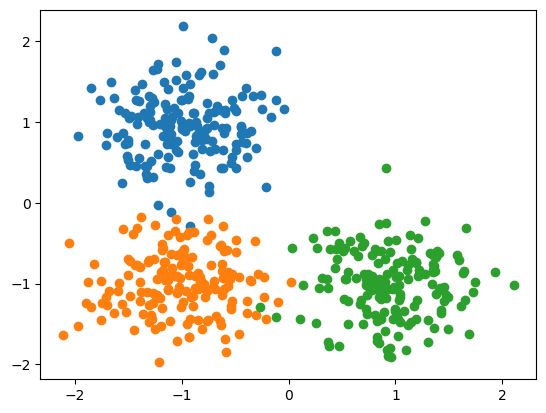

In [67]:
plt.scatter(x[y==0, 0], x[y==0, 1])#plots the points that are centered at[-1, 1]
plt.scatter(x[y==1, 0], x[y==1, 1])#plots the points that are centered at[-1, -1]
plt.scatter(x[y==2, 0], x[y==2, 1])#plots the points that are centered at[1, -1]


In [68]:
print(y)
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [69]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss= 'categorical_crossentropy', metrics=['accuracy'])

c:\Users\3omd4\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.fit(x=x, y=y_cat, verbose=1, batch_size = 50, epochs=110)

Epoch 1/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5111 - loss: 0.8276  
Epoch 2/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.2603 
Epoch 3/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.1221 
Epoch 4/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0924 
Epoch 5/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0714 
Epoch 6/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0653 
Epoch 7/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0580 
Epoch 8/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0564 
Epoch 9/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0552 
Epoch 10/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0441 
Epoch 11/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0381 
Epoch 12/110
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [71]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:, 0]) - 0.025, max(X[:, 0]) + 0.025)
  y_span = np.linspace(min(X[:, 1]) - 0.025, max(X[:, 1]) + 0.025)


  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]

  # Assuming `model` is your Sequential model and `x_test` is your test data
  predictions = model.predict(grid)
  predicted_classes = np.argmax(predictions, axis=1)

  #pred_func = model.predict_classes(grid)
  z = predicted_classes.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


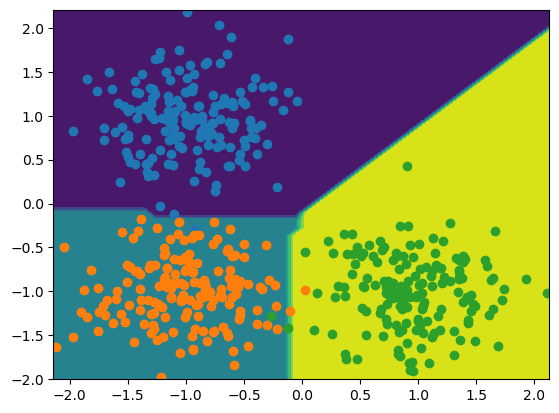

In [72]:
plot_decision_boundary(x, y_cat, model)
plt.scatter(x[y==0, 0], x[y==0, 1])#plots the points that are centered at[-1, 1]
plt.scatter(x[y==1, 0], x[y==1, 1])#plots the points that are centered at[-1, -1]
plt.scatter(x[y==2, 0], x[y==2, 1])#plots the points that are centered at[1, -1]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
prediction is  [[8.0068725e-01 4.5314690e-04 1.9885957e-01]]


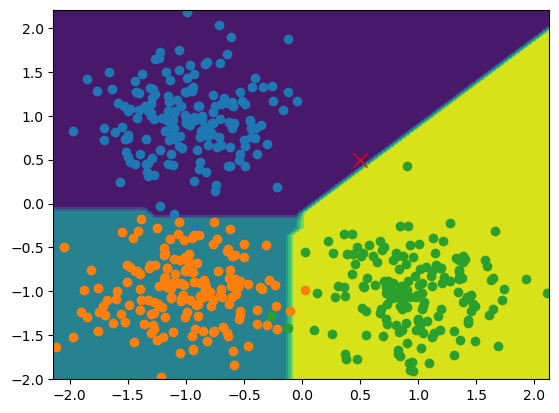

In [75]:
plot_decision_boundary(x, y_cat, model)
plt.scatter(x[y==0, 0], x[y==0, 1])#plots the points that are centered at[-1, 1]
plt.scatter(x[y==1, 0], x[y==1, 1])#plots the points that are centered at[-1, -1]
plt.scatter(x[y==2, 0], x[y==2, 1])#plots the points that are centered at[1, -1]

X, Y=0.5, 0.5
point = np.array([[X, Y]])
predictions = model.predict(point)
predicted_classes = np.argmax(predictions, axis=1)

plt.plot([X], [Y], marker='x', markersize=10, color = 'red')
print("prediction is ", predictions)